## Sales Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import data
df = pd.read_excel('all_tables.xlsx')

In [15]:
df.dtypes

transaction_id                  int64
transaction_date       datetime64[ns]
transaction_time               object
transaction_qty                 int64
store_id                        int64
store_location                 object
product_id                      int64
unit_price                    float64
product_category               object
product_type                   object
product_detail                 object
Item                           object
Cost                          float64
sales                         float64
merge                         float64
profit                        float64
temperature                     int64
rainfall                      float64
weather_description            object
Holiday Name                   object
Date                   datetime64[ns]
month                           int32
Holiday                         int64
dtype: object

### store profits

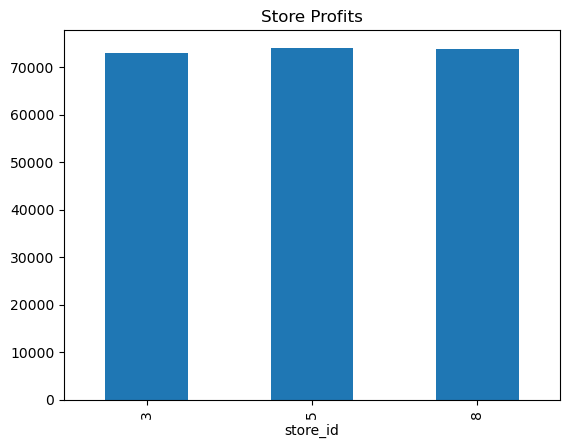

store_id
3    72885.70
5    74081.25
8    73735.48
Name: profit, dtype: float64


In [24]:
grouped_store = df.groupby('store_id')['profit'].sum()
grouped_store.plot(kind='bar')
plt.title('Store Profits')
plt.show()

print(grouped_store)

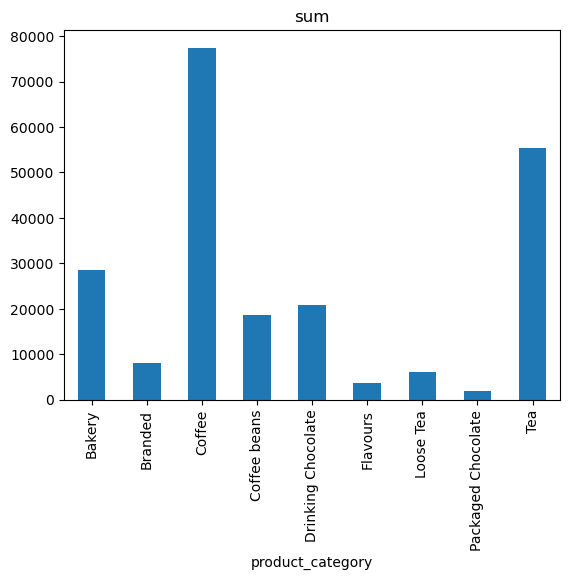

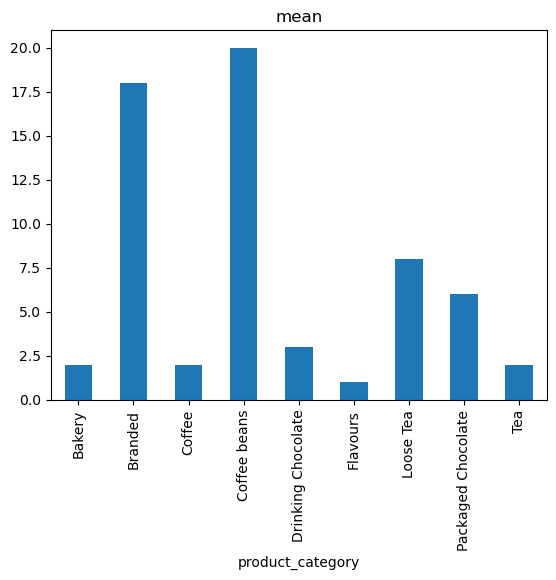

In [38]:
grouped_store = df.groupby('product_category')['profit'].agg(['sum','mean'])
grouped_store = round(grouped_store)

for x in grouped_store.columns:
    grouped_df = grouped_store[x]
    grouped_df.plot(kind='bar')
    plt.title()
    plt.show()

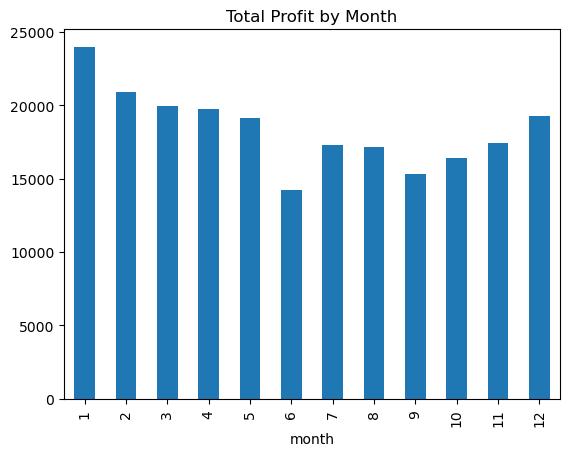

In [18]:
df['month'] = df['transaction_date'].dt.month
df_month = df.groupby('month')['profit'].sum()
df_month.plot(kind='bar', title='Total Profit by Month')
plt.show()

### Peak and Off-peak time analysis

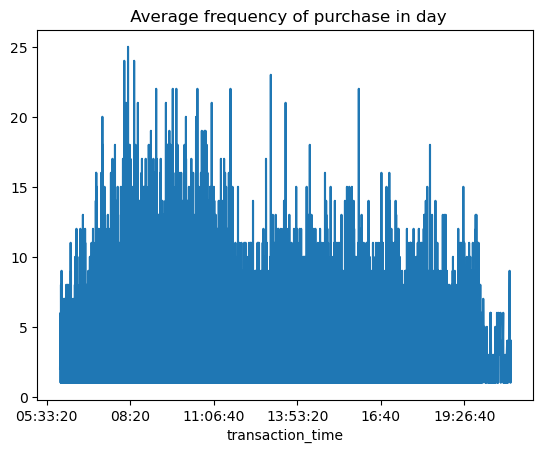

In [19]:
# minutes performace
df_grouped_time = df.groupby('transaction_time')['transaction_id'].count()
df_grouped_time.plot(kind='line', title=' Average frequency of purchase in day')
plt.show()

### Category Gross profit and Avg. order quantity

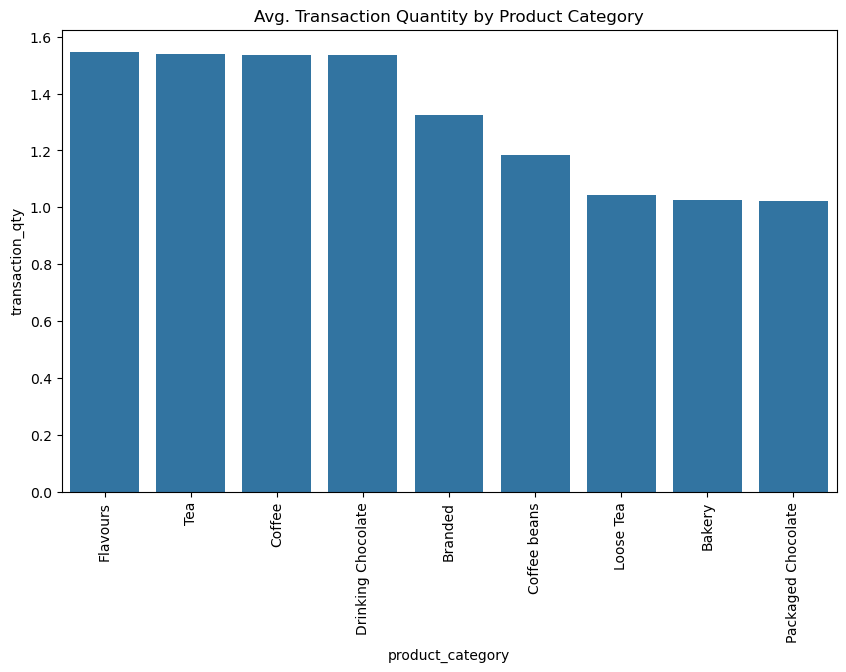

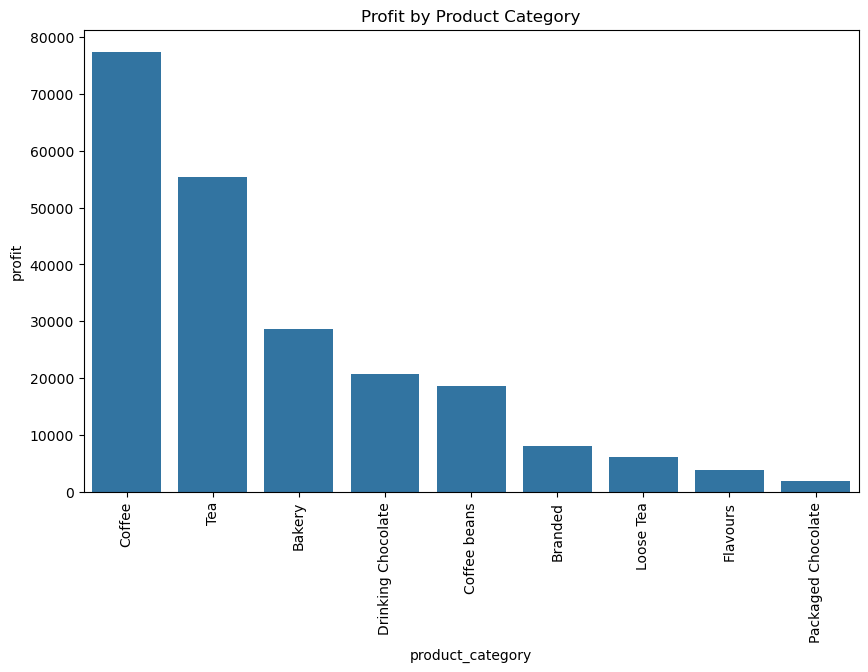

In [20]:
category_pivot = df.groupby('product_category')[['transaction_qty', 'profit']].agg({'transaction_qty': 'mean', 'profit': 'sum'}).reset_index()

# Sort the data by 'transaction_qty' and 'profit'
category_pivot_qty_sorted = category_pivot.sort_values('transaction_qty', ascending=False)
category_pivot_profit_sorted = category_pivot.sort_values('profit', ascending=False)

# Create a barplot for transaction quantity
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='transaction_qty', data=category_pivot_qty_sorted)
plt.title('Avg. Transaction Quantity by Product Category')
plt.xticks(rotation=90)
plt.show()

# Create a barplot for profit
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='profit', data=category_pivot_profit_sorted)
plt.title('Profit by Product Category')
plt.xticks(rotation=90)
plt.show()

### Temperature influence to performance

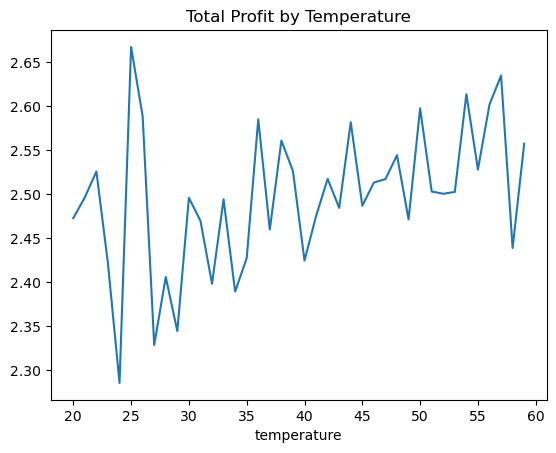

In [39]:
grouped_data = df.groupby('temperature')['profit'].mean()

# Plot the total profit by temperature as a line plot
grouped_data.plot(kind='line')
plt.title('Total Profit by Temperature')
plt.show()

### Store monthly performance

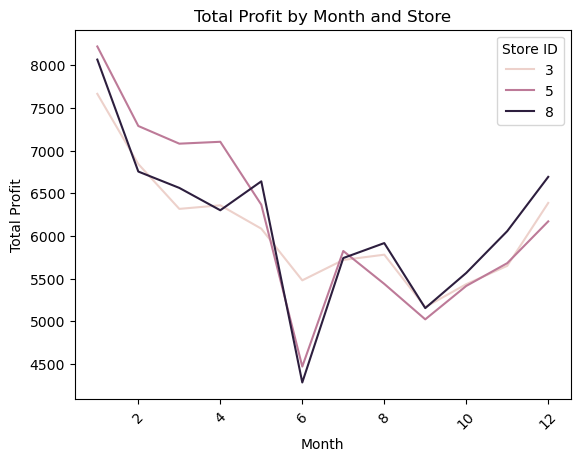

In [22]:
df['month'] = df['transaction_date'].dt.month

# Group by 'month' and 'store_id' and sum the profits
df_month = df.groupby(['month', 'store_id'])['profit'].sum().reset_index()

# Create a barplot
sns.lineplot(data=df_month, x='month', y='profit', hue='store_id')

# Show the plot
plt.title('Total Profit by Month and Store')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate month labels for readability
plt.legend(title='Store ID')
plt.show()

### Holiday sales and order total

   Holiday           Metric     Avg $
0        0            sales  4.766334
1        1            sales  4.695710
2        0  transaction_qty  1.453442
3        1  transaction_qty  1.486542


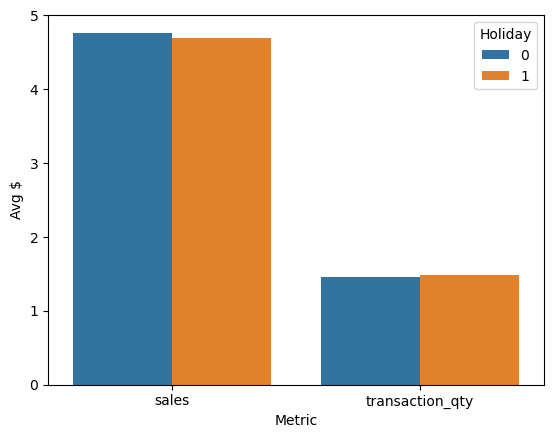

In [37]:
df['Holiday'] = df['Holiday Name'].apply(lambda x: 0 if pd.isna(x) else 1)
holiday = df.groupby('Holiday')[['sales','transaction_qty']].mean().reset_index()
holiday_melted = holiday.melt(id_vars='Holiday', var_name='Metric', value_name='Value')
holiday_melted = holiday_melted.rename(columns={ 'Value': 'Avg $'})
print(holiday_melted)

# bar chart
sns.barplot(data=holiday_melted, x='Metric', y='Avg $', hue='Holiday')
plt.show()
